In [2]:
"""
Created on Fri May 29 19:57:50 2020

@author: Shivanshu Agnihotri
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline 

data=pd.read_csv('fifa20_data.csv',low_memory=False)
data.info() #column listing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              18547 non-null  object
 1   Image             18547 non-null  object
 2   Country           18547 non-null  object
 3   Position          18547 non-null  object
 4   Age               18547 non-null  int64 
 5   Overall           18547 non-null  int64 
 6   Potential         18547 non-null  int64 
 7   Club              18291 non-null  object
 8   ID                18547 non-null  int64 
 9   Height            18547 non-null  object
 10  Weight            18547 non-null  object
 11  foot              18547 non-null  object
 12  BOV               18547 non-null  int64 
 13  BP                18547 non-null  object
 14  Growth            18547 non-null  int64 
 15  Joined            18547 non-null  object
 16  Loan Date End     1387 non-null   object
 17  Value       

In [2]:
data.head(5) 

,Name,Image,Country,Position,Age,Overall,Potential,Club,ID,Height,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Lionel Messi,https://cdn.sofifa.org/players/4/20/158023.png,Argentina,"RW,CF,ST",32,94,94,FC Barcelona,158023,"5'7""",...,Medium,Low,5,87,92,92,96,39,66,585
1,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.org/players/4/20/20801.png,Portugal,"ST,LW",34,93,93,Juventus,20801,"6'2""",...,High,Low,5,90,93,82,89,35,78,448
2,Neymar da Silva Santos Jr.,https://cdn.sofifa.org/players/4/20/190871.png,Brazil,"LW,CAM",27,92,92,Paris Saint-Germain,190871,"5'9""",...,High,Medium,5,91,85,87,95,32,58,432
3,Jan Oblak,https://cdn.sofifa.org/players/4/20/200389.png,Slovenia,GK,26,91,91,Atlético Madrid,200389,"6'2""",...,Medium,Medium,3,87,92,78,89,52,90,240
4,Kevin De Bruyne,https://cdn.sofifa.org/players/4/20/192985.png,Belgium,"CAM,CM",28,91,91,Manchester City,192985,"5'11""",...,High,High,4,76,86,92,86,61,78,298


In [3]:
# deleting unnecessary or redundant columns 
# drop vs del -> drop operates on both columns and rows while del operates on column only.
# drop can operate on multiple items at a time as well. 

#del data['Image']
data.drop(['Image','Age','Height','Weight','Club','foot','Growth','BOV','Joined','Loan Date End','Value','Wage','Release Clause'],axis=1,inplace=True) #deleting unnecessary columns such as age height etc. 
data.info() #after column deletion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18547 entries, 0 to 18546
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              18547 non-null  object
 1   Country           18547 non-null  object
 2   Position          18547 non-null  object
 3   Overall           18547 non-null  int64 
 4   Potential         18547 non-null  int64 
 5   ID                18547 non-null  int64 
 6   BP                18547 non-null  object
 7   Attacking         18547 non-null  int64 
 8   Crossing          18547 non-null  int64 
 9   Finishing         18547 non-null  int64 
 10  Heading Accuracy  18547 non-null  int64 
 11  Short Passing     18547 non-null  int64 
 12  Volleys           18547 non-null  int64 
 13  Skill             18547 non-null  int64 
 14  Dribbling         18547 non-null  int64 
 15  Curve             18547 non-null  int64 
 16  FK Accuracy       18547 non-null  int64 
 17  Long Passing

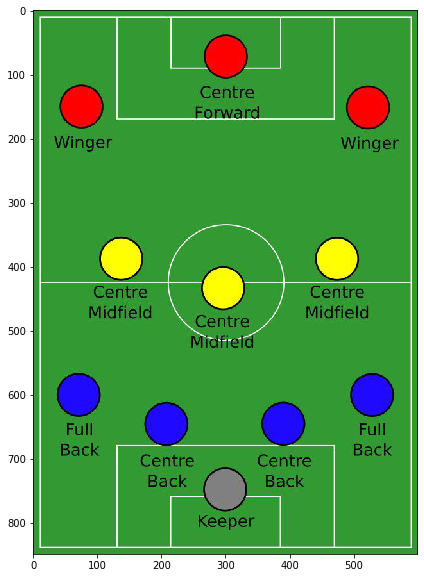

In [4]:
# formation considered -> 4-3-3- (4 defenders 3 mid fielders  2 Wing Players  1 striker)
  
# formation  
plt.figure(figsize=(7,10))
img = mpimg.imread('4-3-3_formation.jpg') 
plt.imshow(img) 

# weights are assigned to focus more on certain attributes 


w1 = 0.50
w2= 1
w3 = 2

'''
Goal keeper selection 
->Stopper - Good in stopping shots taken 
->Pass - Good in passing such as long pass,kickcing etc.

Weightage selection for attributes : A stopper must be good with diving abilitites hence w4 is selected for GK_Diving. Similarly 
other weights are used.

'''

data['GK_Stopper'] = (w3*data['GK Diving'] + w3*data['GK Handling'] + w3*data['GK Reflexes'] + w2*data['Jumping'] + w2*data['Strength'] + w2*data['GK Positioning'] + w1*data['Mentality'])  /    (1*w1 + 3*w2 + 3*w3)
data['GK_Pass'] = (w3* data['GK Kicking'] + w3*data['Short Passing'] + w3*data['Long Passing'] + w2*data['Shot Power'] +  w2*data['Jumping'] + w2*data['GK Diving']+ w1*data['GK Reflexes'] + w1*data['Vision'])/(2*w1 + 3*w2 + 3*w3)


Text(10.050000000000004, 0.5, 'Stopping Score')

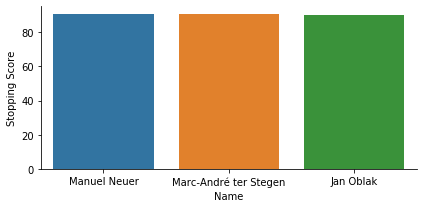

In [5]:

#top stopper

d = data.sort_values('GK_Stopper', ascending=False)[:3] # top 3 selection

sns.catplot(x="Name", y="GK_Stopper", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Stopping Score")



Text(10.050000000000004, 0.5, 'Passing Score')

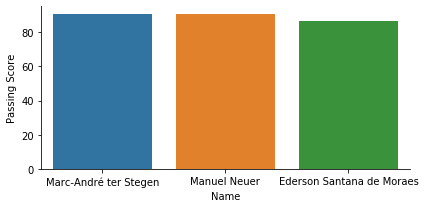

In [6]:
# top passer 

d = data.sort_values('GK_Pass', ascending=False)[:3] # top 3 selection
            
sns.catplot(x="Name", y="GK_Stopper", data=d,
                height=3, kind="bar", aspect=2 )
plt.ylabel("Passing Score")


In [7]:
# M Neuer tops in stopping category and M Stegen tops in passing 

d[(d['GK_Stopper'] + d['GK_Pass'] ) == (d['GK_Stopper'] + d['GK_Pass']).max()]['Name'] # max score after combining both attribues 
# Hence Marc-André ter Stegen is selected as GK

8    Marc-André ter Stegen
Name: Name, dtype: object

In [8]:
'''
Defender Selction
->2 Center Back  - who plays at center back position includes left center back and right center back 
->2 Full Back - Player who plays wing backs includes left wing back and right wing back. 
'''

data['DF_Center_Back'] = (w3*data['Defending']+ w3*data['Standing Tackle']+ w3*data['Sliding Tackle'] + w2*data['Short Passing'] + w2*data['Long Passing'] + w2*data['Composure'] + w2*data['Reactions'] + w2*data['Interceptions'] + w1*data['Aggression']+ w1*data['Jumping'] + w1*data['Vision']) /    (3*w1 + 5*w2 + 3*w3)
data['DF_Full_Back'] = (w3*data['Standing Tackle']+ w3*data['Sliding Tackle']  + w2*data['Marking'] +  w2*data['Jumping'] + w2*data['Short Passing'] + w2*data['Long Passing'] + w1*data['Vision']+ w1*data['Dribbling'] + w1*data['Stamina'] + w1*data['Crossing']+ w1*data['Sprint Speed'])/(5*w1 + 4*w2 + 2*w3)

Text(3.6750000000000043, 0.5, 'Left Center Back Score')

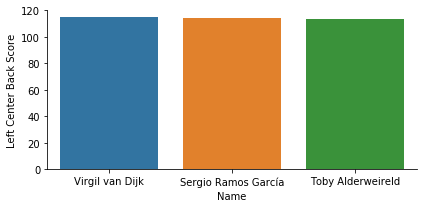

In [9]:

#left center back player

d = data[(data['Position'] == 'LB') | (data['Position'] == 'CB')].sort_values('DF_Center_Back', ascending=False)[:3]

sns.catplot(x="Name", y="DF_Center_Back", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Left Center Back Score")

#Virgil van Dijk selected as LCB player

Text(3.6750000000000043, 0.5, 'Right Center Back Score')

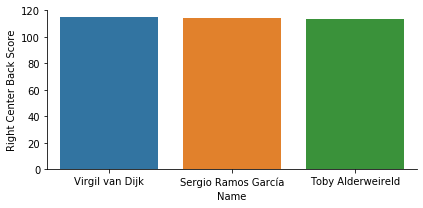

In [10]:

#right center back player

d = data[(data['Position'] == 'RB') | (data['Position'] == 'CB')].sort_values('DF_Center_Back', ascending=False)[:3]

sns.catplot(x="Name", y="DF_Center_Back", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Right Center Back Score")

#Sergio Ramos is selected as RCB player

Text(10.050000000000004, 0.5, 'Left Wing Back Score')

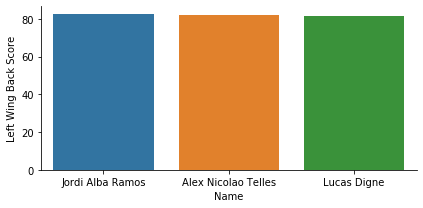

In [29]:

#Left Wing Back

d = data[(data['Position'] == 'LWB,LB')|(data['Position'] == 'LWB,CB')|(data['Position'] == 'LWB')|(data['Position'] == 'LB')].sort_values('DF_Full_Back', ascending=False)[:3]

sns.catplot(x="Name", y="DF_Full_Back", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Left Wing Back Score")

# Jordi Alba is selected as LWB player

Text(10.050000000000004, 0.5, 'Right Wing Back Score')

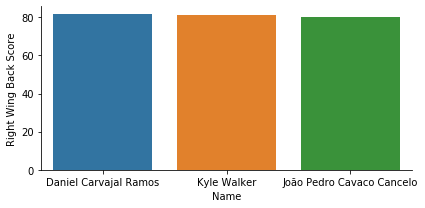

In [30]:

#Right Wing Back

d = data[(data['Position'] == 'RWB,RB')|(data['Position'] == 'RWB,CB')|(data['Position'] == 'RWB')|(data['Position'] == 'RB')].sort_values('DF_Full_Back', ascending=False)[:3]

sns.catplot(x="Name", y="DF_Full_Back", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Right Wing Back Score")

# Daniel Carvajal is selected as RWB player

In [46]:
'''
Mid Fielders Selection 
Three players :
LCM or LM -> Left center mid 
LCM or RM -> Right center mid 
CM -> Center Mid
A mid players must be good in attributes such as crossing, tackling and passes. 
Same attributes are selected for each mid players just position is changed

'''

data['MID_Center'] = ( w3*data['Short Passing'] + w3*data['Long Passing']+ w3*data['Crossing'] +w3*data['Ball Control'] + w3*data['Dribbling'] + w2*data['Reactions'] + w2*data['Vision'] + w1*data['Positioning']  + w2*data['Long Shots'] + w1*data['FK Accuracy'])/(2*w1 + 3*w2 + 5*w3)
data['MID_Right'] = ( w3*data['Short Passing'] + w3*data['Long Passing']+ w3*data['Crossing'] +w3*data['Ball Control'] + w3*data['Dribbling'] + w2*data['Reactions'] + w2*data['Vision'] + w1*data['Positioning']  + w2*data['Long Shots'] + w1*data['FK Accuracy'])/(2*w1 + 3*w2 + 5*w3)
data['MID_Left'] = ( w3*data['Short Passing'] + w3*data['Long Passing']+ w3*data['Crossing'] +w3*data['Ball Control'] + w3*data['Dribbling'] + w2*data['Reactions'] + w2*data['Vision'] + w1*data['Positioning']  + w2*data['Long Shots'] + w1*data['FK Accuracy'])/(2*w1 + 3*w2 + 5*w3)


Text(10.050000000000004, 0.5, 'Center Mid Score')

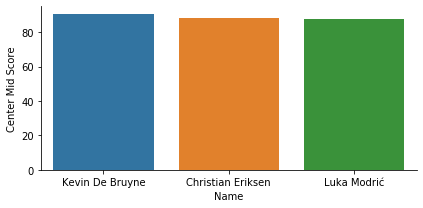

In [43]:
d = data[(data['Position'] == 'CAM,CM')| (data['Position'] == 'CM') |(data['Position'] == 'CAM') |(data['Position'] == 'CM,CAM')].sort_values('MID_Center', ascending=False)[:3]

sns.catplot(x="Name", y="MID_Center", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Center Mid Score")

# Kevin De Bruyne is Selected as center mid player

Text(10.050000000000004, 0.5, 'Right Mid Score')

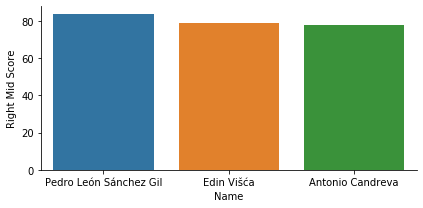

In [47]:
d = data[(data['Position'] == 'RM')].sort_values('MID_Right', ascending=False)[:3]

sns.catplot(x="Name", y="MID_Right", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Right Mid Score")

# Pedro leonis Selected as Right Mid player 

Text(10.050000000000004, 0.5, 'Left Mid Score')

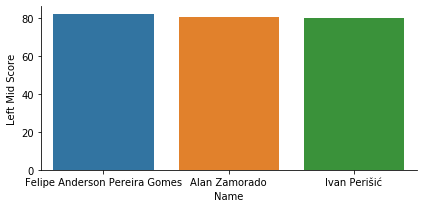

In [48]:
d = data[(data['Position'] == 'LM')].sort_values('MID_Right', ascending=False)[:3]

sns.catplot(x="Name", y="MID_Left", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Left Mid Score")

# Felipe Anderson is Selected as Left Mid player 

In [77]:
'''
Left Wing Attacker
Ataacker should be good in attributes such as acceleration,atatcking etc 
'''

data['Attacker_Left'] = ( w3*data['Acceleration']+ w3*data['Attacking'] +  w3*data['Dribbling'] + w3*data['Sprint Speed']  + w2*data['Movement'] + w2*data['Ball Control'] + w2*data['Crossing'] + w1*data['Vision'] +   w3*data['Short Passing'] + w1*data['Long Passing'] + w2*data['Aggression'] + w1*data['Agility'] + w1*data['Curve'] + w2*data['Sprint Speed'] + w3*data['Heading Accuracy'] + w3*data['Finishing'])/(4*w1 + 5*w2 + 7*w3)

Text(3.6750000000000043, 0.5, 'LeftWing Attacker Score')

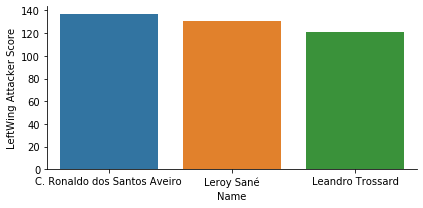

In [97]:


d = data[(data['Position'] == 'ST,LW')| (data['Position'] == 'LW') ].sort_values('Attacker_Left', ascending=False)[:3]

sns.catplot(x="Name", y="Attacker_Left", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("LeftWing Attacker Score")

# C Ronaldo is Selected as Left Wing Attacker

In [ ]:
'''
Right Wing Attacker
Same attributes as left wing just position is changed
'''

data['Attacker_Right'] = ( w3*data['Acceleration']+ w3*data['Attacking'] +  w3*data['Dribbling'] + w3*data['Sprint Speed']  + w2*data['Movement'] + w2*data['Ball Control'] + w2*data['Crossing'] + w1*data['Vision'] +   w3*data['Short Passing'] + w1*data['Long Passing'] + w2*data['Aggression'] + w1*data['Agility'] + w1*data['Curve'] + w2*data['Sprint Speed'] + w3*data['Heading Accuracy'] + w3*data['Finishing'])/(4*w1 + 5*w2 + 7*w3)

Text(3.6750000000000043, 0.5, 'LeftWing Attacker Score')

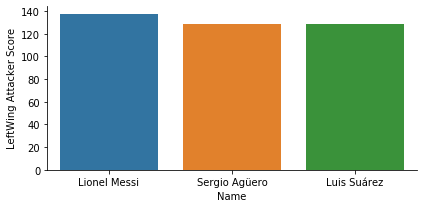

In [99]:


d = data[(data['Position'] == 'RW,CF,ST')| (data['Position'] == 'RW') | (data['Position'] == 'ST') | (data['Position'] == 'CF') ].sort_values('Attacker_Left', ascending=False)[:3]

sns.catplot(x="Name", y="Attacker_Left", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("LeftWing Attacker Score")

# L Messi is selected as RW player

In [100]:
'''
Striker Selection
Striker should be good in attributes such as finishing,crossing etc 
'''

data['Striker'] = ( w3*data['Finishing']+w3*data['Acceleration']+ w2*data['W/F'] + w2*data['Ball Control'] + w2*data['Dribbling'] + w2*data['Sprint Speed']  + w2*data['Crossing'] + w1*data['Vision'] +   w1*data['Short Passing'] + w1*data['Long Passing'] + w1*data['Aggression'] + w1*data['Agility'] + w1*data['Curve'] + w2*data['Long Shots'] + w2*data['FK Accuracy'] )/(6*w1 + 7*w2 + 2*w3)

Text(10.050000000000004, 0.5, 'Right Wing Back Score')

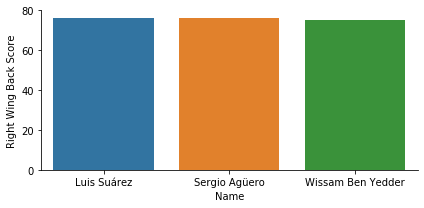

In [101]:

#Striker

d = data[(data['Position'] == 'ST')| (data['Position'] == 'CF')].sort_values('Striker', ascending=False)[:3]

sns.catplot(x="Name", y="Striker", data=d, kind="bar" ,height=3, aspect=2) 

plt.ylabel("Right Wing Back Score")

# L Suarez is selected as Striker

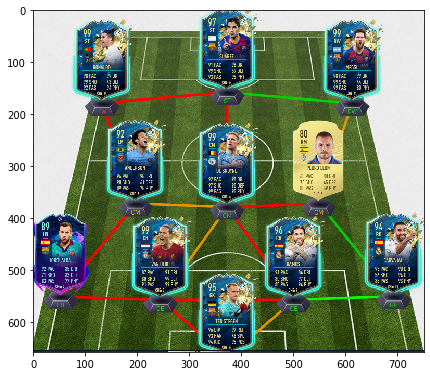

In [49]:
# Final team 
plt.figure(figsize=(7,10))
img = mpimg.imread('final_team.png') 
plt.imshow(img) 